In [1]:
# 1. a
# 2. b
# 3. d

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')

from sklearn.cluster import KMeans

# Reading the csv
interactions = pd.read_csv('customer_interactions.csv')
interactions.head()

,spend,interactions
0,5818,23
1,6255,15
2,6139,15
3,6070,19
4,4837,24


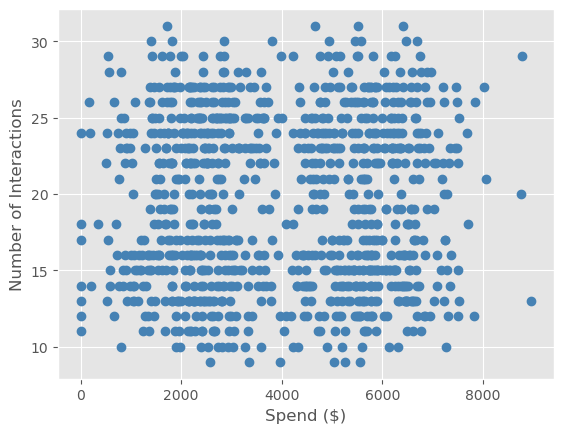

In [4]:
plt.plot('spend', 'interactions', 'o', data = interactions, color = 'steelblue')
plt.xlabel('Spend ($)')
plt.ylabel('Number of Interactions');

In [5]:
interactions['z_spend'] = (interactions['spend'] - interactions['spend'].mean()) / interactions['spend'].std()
interactions['z_interactions'] = (interactions['interactions'] - interactions['interactions'].mean()) / interactions['interactions'].std()
interactions.head()

,spend,interactions,z_spend,z_interactions
0,5818,23,0.923351,0.647282
1,6255,15,1.145958,-0.809740
2,6139,15,1.086868,-0.809740
3,6070,19,1.051719,-0.081229
4,4837,24,0.423632,0.829410


In [6]:
# Clustering the data into 4 clusters
four_clusters = KMeans(n_clusters = 4, n_init = 20).fit(interactions[['z_spend', 'z_interactions']])

# Appending clustering results
interactions['cluster'] = four_clusters.labels_
interactions.head(10)

,spend,interactions,z_spend,z_interactions,cluster
0,5818,23,0.923351,0.647282,0
1,6255,15,1.145958,-0.809740,1
2,6139,15,1.086868,-0.809740,1
3,6070,19,1.051719,-0.081229,1
4,4837,24,0.423632,0.829410,0
5,1725,31,-1.161613,2.104305,3
6,4433,16,0.217836,-0.627612,1
7,3480,25,-0.267620,1.011538,3
8,6602,11,1.322719,-1.538252,1
9,2383,16,-0.826429,-0.627612,2


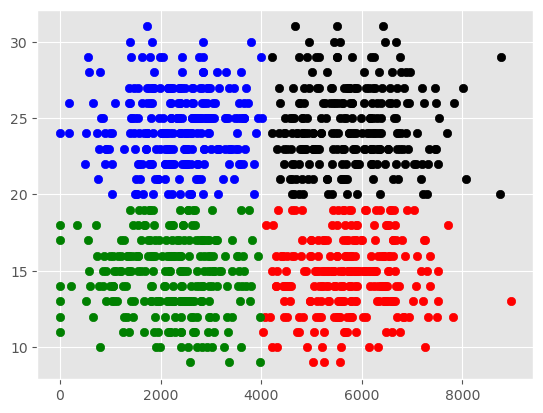

In [9]:
# Visualizing clustering results 
colors = ['black', 'red', 'green', 'blue']

for c in interactions['cluster'].unique():

    temp_data = interactions[interactions['cluster'] == c]
    plt.scatter(temp_data['spend'], temp_data['interactions'], color = colors[c])